# Анализ статистики выдачи шенгенских виз

Этот проект представляет собой сбор данных и ответы на вопросы, связанные с шенгенскими визами: заявки, выдачи, невыдачи в зависимости от страны, в которую идут заявки и из какой страны.

Данные взяты с https://www.kaggle.com/ma7555/schengen-visa-stats#2018-data-for-consulates.csv

Создательница проекта - Мурашова Анастасия

**Исследовательский план**

- Характеристика и обоснование данных
- Первичный анализ данных
- Формирование исследовательских вопросов
- Выбор технологий
- Составление рейтингов по поставленым вопросам
- Выводы

*Примечание: все доли в проекте представлены в численных значениях от 0 до 1, не в процентных соотношениях*

### Загрузка и чтение данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Общий вид исходных данных

In [3]:
data = pd.read_csv('../Schengen project/2018-data-for-consulates.csv')
data.head(5)

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


In [4]:
print(data.columns)

Index(['Schengen State', 'Country where consulate is located', 'Consulate',
       'Airport transit visas (ATVs) applied for ',
       ' ATVs issued (including multiple)', 'Multiple ATVs issued',
       'ATVs not issued ', 'Not issued rate for ATVs',
       'Uniform visas applied for',
       'Total  uniform visas issued (including MEV) \n',
       'Multiple entry uniform visas (MEVs) issued',
       'Share of MEVs on total number of uniform visas issued',
       'Total LTVs issued', 'Uniform visas not issued',
       'Not issued rate for uniform visas',
       'Total ATVs and uniform visas applied for',
       'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ',
       'Total ATVs and uniform visas not issued',
       'Not issued rate for ATVs and uniform visas '],
      dtype='object')


Перевод названий колонок:

 - Государство Шенгенской зоны
 - Страна, где расположено консульство
 - Консульство (город)
 - Заявки на транзитные визы в аэропорту (ATV) 
 - Выпущенные транзитные визы (включая многократные)
 - Выпущены многократные транзитные визы
 - Отказы по многократным транзитные визы
 - Рейтинг отказов по многократным транзитным визам
 - Подачи на единые визы, 
 - Всего выдано единых виз (включая MEV)
 - Выданы многократные въездные визы (MEV)
 - Доля MEVs в общем количестве выданных единых виз
 - Всего выпущено ограниченных по количеству въезда виз (LTV)
 - Единые визы не выданы
 - Рейтинг не выпущенных единых виз
 - Общее количество подач на транзитные и единые визы
 - Всего выдано ATV и единых виз (включая несколько ATV, MEV и LTV)
 - Всего транзитных и единых виз не выдано
 - Рейтинг не выпущенных тариф на транзитные и единые визы

**Какие типы виз (ATV, MEV, LTV) были выданы и в каком количестве**

Так как в конце датасета у нас есть суммарные данные по заявкам и выдачам-невыдачам виз, то я выбираю этот срез и переименовываю ряды, по этому срезу можно посмотреть, сколько было заявок на визы, одобрений и отказов суммарно за 2018 год

In [11]:
total_data = data.iloc[1904:1907, 3:19]
total_data.rename(index={1904:'Selection Sub total in 2018',1905:'Total worldwide 2018',1906:'Share of subtotal on worldwide total'}, inplace=True)
total_data

,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV) \n,Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
Selection Sub total in 2018,"5,313","4,277","1,553",767,14.4%,"16,016,599","14,265,282","8,325,850",58.4%,"113,687","1,539,362",9.6%,"16,021,912","14,383,246","1,540,129",9.6%
Total worldwide 2018,"5,313","4,277","1,553",767,14.4%,"16,016,599","14,265,282","8,325,850",58.4%,"113,687","1,539,362",9.6%,"16,021,912","14,383,246","1,540,129",9.6%
Share of subtotal on worldwide total,100%,100%,100%,100%,NaN,100%,100%,100%,NaN,100%,100%,NaN,100%,100%,100%,NaN


По этому саммари мы видим, что в 2018 году шенгенских виз выдавали много, отказов по всем типам виз не больше 10%

**Сколько заявок на трансферные визы было подано в сравнении со всеми заявками**

In [12]:
total_data['Numeric global ATV applies'] = total_data['Airport transit visas (ATVs) applied for ']\
    .iloc[:2].apply(lambda s: int(s.replace(',', '')))
total_data['Numeric global applies'] = total_data['Total ATVs and uniform visas applied for']\
    .iloc[:2].apply(lambda s: int(s.replace(',', '')))

global_atv_applies = total_data['Numeric global ATV applies'].iloc[:1].sum()
global_applies = total_data['Numeric global applies'].iloc[:1].sum()
print("Share of ATV applies is", round(((global_atv_applies/global_applies)*100), 2), '%')

Share of ATV applies is 0.03 %


Трансферных виз требуется немного, всего 3 сотые процента, а это значит, что мы можем пренебрегать такими данными, когда будем смотреть на щедрость консульств

**Шансы получить визу, ограниченую по сроку действия или более выгодную**

In [13]:
total_data['Numeric uniform visa issued'] = total_data['Total  uniform visas issued (including MEV) \n']\
    .iloc[:2].dropna().apply(lambda s: int(s.replace(',', '')))
total_data['Numeric uniform visa applies'] = total_data['Uniform visas applied for'].iloc[:2]\
    .dropna().apply(lambda s: int(s.replace(',', '')))

issued_bq_visas = total_data['Numeric uniform visa issued'].iloc[:1].sum()
applied_bq_visas = total_data['Numeric uniform visa applies'].iloc[:1].sum()
print('Chances for getting LTV or better quality of visa', round(((issued_bq_visas/applied_bq_visas)*100), 2), '%')

Chances for getting LTV or better quality of visa 89.07 %


**Какие консульства в каждой стране наиболее щедры**

Обработка данных для изменения формата, заполнения пропущенных значений или их корректировки

Так как конец таблицы пресдтавляет собой итоги, мы не будем использовать его в нашем анализе данных и создадим новый датафрейм, в котором будем использовать итоговое количество поданных заявок на визы, их одобрения и отказы, поменяем формат строковых данных на численные для удобства вычислений

In [15]:
numeric_data = data.iloc[:1900, 0:3]
numeric_data['Numeric applies'] = data['Total ATVs and uniform visas applied for']\
    .iloc[:1900].dropna().apply(lambda s: int(s.replace(',', '')))
numeric_data['Numeric total issued visas'] = data['Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ']\
    .iloc[:1900].dropna().apply(lambda s: int(s.replace(',', '')))
numeric_data['Numeric not issued visas'] = data['Total ATVs and uniform visas not issued']\
    .iloc[:1900].dropna().apply(lambda s: int(s.replace(',', '')))

Так как я не знаю и не могу предположить, какое число заявок было пропущено, отсутствующие данные заполню нулями

In [16]:
numeric_data = numeric_data.fillna(0, axis = 0)

In [17]:
numeric_data

,Schengen State,Country where consulate is located,Consulate,Numeric applies,Numeric total issued visas,Numeric not issued visas
0,Austria,ALBANIA,TIRANA,62.0,53.0,9.0
1,Austria,ALGERIA,ALGIERS,2481.0,1659.0,822.0
2,Austria,ARGENTINA,BUENOS AIRES,16.0,16.0,0.0
3,Austria,AUSTRALIA,CANBERRA,2776.0,2654.0,122.0
4,Austria,AZERBAIJAN,BAKU,1977.0,1898.0,79.0
...,...,...,...,...,...,...
1895,Switzerland,USA,"NEW YORK, NY",3562.0,3545.0,17.0
1896,Switzerland,USA,"SAN FRANCISCO, CA",3643.0,3637.0,6.0
1897,Switzerland,USA,"WASHINGTON, DC",1066.0,1036.0,30.0
1898,Switzerland,VENEZUELA,CARACAS,7.0,6.0,1.0


Затем я создаю новые колонки с долями одобрений и отказов по визам

In [18]:
numeric_data['Numeric applies'] = numeric_data[['Numeric applies', 'Numeric total issued visas', 'Numeric not issued visas']]\
.apply(lambda x: x['Numeric applies'] if x['Numeric total issued visas'] <= x['Numeric applies'] \
       else x['Numeric total issued visas']+x['Numeric not issued visas'], axis = 1)

In [19]:
numeric_data['Numeric applies'] = numeric_data[['Numeric applies', 'Numeric total issued visas', 'Numeric not issued visas']]\
.apply(lambda x: x['Numeric applies'] if x['Numeric not issued visas'] <= x['Numeric applies'] \
       else x['Numeric total issued visas']+x['Numeric not issued visas'], axis = 1)

In [20]:
numeric_data['Share of issued visas'] = numeric_data['Numeric total issued visas']/numeric_data['Numeric applies']

In [21]:
numeric_data['Share of not issued visas'] = numeric_data['Numeric not issued visas']/numeric_data['Numeric applies']

**Рейтинг щедрости консульств по количественным значениям выданных виз**

Суммарные значения выданных виз в каждом консульстве

In [22]:
numeric_data.groupby(['Consulate'])['Numeric total issued visas'].sum().sort_values(ascending = False).head(5)

Consulate
MOSCOW            2542131.0
BEIJING           1058086.0
SHANGHAI           923186.0
ST. PETERSBURG     741242.0
NEW DELHI          534188.0
Name: Numeric total issued visas, dtype: float64

**Рейтинг щедрости консульств по доле выданных виз**

Итоговые доли выданных виз в каждом консульстве

In [23]:
numeric_data.groupby(['Consulate'])['Share of issued visas'].mean().sort_values(ascending = False).head(25)

Consulate
ZURICH                1.000000
TALLINN               1.000000
BAHIA BLANCA          1.000000
REYKJAVIK             1.000000
ROSARIO (Santa Fé)    1.000000
HAMBURG               1.000000
GUADALAJARA           1.000000
SAN SALVADOR          1.000000
LUGANO                1.000000
SUBOTICA              1.000000
JUBA                  1.000000
AMSTERDAM             1.000000
LYON                  1.000000
TAMPA, FL             1.000000
GJIROKASTER           1.000000
VALETTA               1.000000
VICTORIA              1.000000
VILNIUS               1.000000
BARCELONA             1.000000
CORDOBA               1.000000
CLEVELAND, OH         1.000000
GRODNO                0.997340
KAZAN                 0.997318
BREST                 0.997160
PSKOV                 0.996274
Name: Share of issued visas, dtype: float64

Обработка данных и создание функции для отображения интерактивной карты мира

Теперь я хочу создать карту, по которой можно было бы ориентироваться, в каких странах выдают больше-меньше виз, которые можно распознать по тому, насколько яркий цвет каждой страны на карте

In [16]:
codes_world = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BLR', 
             'BEL', 'BEN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 
             'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COD', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 
             'CZE', 'DNK', 'DJI', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 
             'GAB', 'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'GIN', 'GNB', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 
             'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KSV', 'KWT', 'KGZ',  
             'LAO', 'LVA', 'LBN', 'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT',  
             'MUS', 'MEX', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 
             'NER', 'NGA', 'PRK', 'MKD', 'NOR', 'OMN', 'PAK', 'PSE', 'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 
             'QAT', 'ROU', 'RUS', 'RWA', 'LCA', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SGP', 'SVK', 'SVN', 
             'ZAF', 'KOR', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 
             'TLS', 'TGO', 'TTO', 'TUN', 'TUR', 'TKM', 'UGA', 'UKR', 'ARE', 'GBR', 'URY', 'USA', 'UZB', 'VUT', 
             'VEN', 'VNM', 'ZMB', 'ZWE']

In [17]:
list_of_generosity_world = numeric_data.groupby(['Country where consulate is located'])['Share of issued visas'].mean()
generosity_wld_df = list_of_generosity_world.reset_index() 
generosity_wld_df['Code'] = codes_world

In [18]:
def mappa(Locations, Z, Text, Colorscale, Reversescale, Colorbar_title, Title_text, Projection_type, Text_source):

    
    import plotly.io as pio
    pio.renderers.default = "notebook_connected"
    
    
    fig = go.Figure(data=go.Choropleth(
        locations = Locations,
        z = Z,
        text = Text,
        colorscale = Colorscale,
        autocolorscale = False,
        reversescale = Reversescale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = ' ',
        colorbar_title = Colorbar_title,
    ))

    fig.update_layout(
        title_text = Title_text,
        geo=dict(
            showframe = False,
            showcoastlines = False,
            projection_type = Projection_type
        ),
        annotations = [dict(
            x = 0.55,
            y = 0.1,
            xref = 'paper',
            yref = 'paper',
            text = Text_source,
            showarrow = False
        )]
    )

    fig.show()

**Распределение выданных виз по странам-заявительницам**

In [19]:
mappa(generosity_wld_df['Code'], generosity_wld_df['Share of issued visas'],\
      generosity_wld_df['Country where consulate is located'], 'blues', False,\
      'Доля выданных виз', 'Распределение выданных виз по странам-заявительницам', 'kavrayskiy7',\
      'Источник: <a href="https://www.kaggle.com/ma7555/schengen-visa-stats#2018-data-for-consulates.csv">\
            Kaggle')

**Рейтинг строгости консульств по количественным значениям не выданных виз**

In [20]:
numeric_data.groupby(['Consulate'])['Numeric not issued visas'].sum().sort_values(ascending = False).head(5)

Consulate
ALGIERS      168882.0
ORAN          89573.0
TEHERAN       80435.0
NEW DELHI     67324.0
ANNABA        65836.0
Name: Numeric not issued visas, dtype: float64

**Рейтинг строгости консульств по доле не выданных виз**

In [21]:
numeric_data.groupby(['Consulate'])['Share of not issued visas'].mean().sort_values(ascending = False).head()

Consulate
ALEPPO        1.000000
LUBUMBASHI    0.867470
VALENCIA      0.800000
LAGOS         0.510325
MONACO        0.500000
Name: Share of not issued visas, dtype: float64

**Распределение не выданных виз по странам-заявительницам**

In [22]:
list_of_severity_world = numeric_data.groupby(['Country where consulate is located'])['Share of not issued visas'].mean()
severity_wld_df = list_of_severity_world.reset_index() 
severity_wld_df['Code'] = codes_world

In [23]:
mappa(severity_wld_df['Code'], severity_wld_df['Share of not issued visas'],\
      severity_wld_df['Country where consulate is located'], 'reds', False,\
      'Доля не выданных виз', 'Распределение не выданных виз по странам-заявительницам', 'kavrayskiy7',\
      'Источник: <a href="https://www.kaggle.com/ma7555/schengen-visa-stats#2018-data-for-consulates.csv">\
            Kaggle')

**Рейтинг щедрости стран Шенгенского союза**

In [24]:
numeric_data.groupby(['Schengen State'])['Share of issued visas'].mean().sort_values(ascending = False)

Schengen State
Iceland           0.966720
Slovakia          0.958992
Estonia           0.913243
Luxembourg        0.912931
Austria           0.910866
Italy             0.906366
Latvia            0.904608
Greece            0.901202
Switzerland       0.901003
Germany           0.900126
Czech Republic    0.889202
Slovenia          0.885820
Lithuania         0.884841
Poland            0.869614
Finland           0.866860
Portugal          0.858278
Denmark           0.857376
Spain             0.855763
Malta             0.855260
Norway            0.852251
Hungary           0.849709
France            0.837832
Netherlands       0.797146
Belgium           0.777907
Sweden            0.551701
Name: Share of issued visas, dtype: float64

In [25]:
list_of_generosity_schengen = numeric_data.groupby(['Schengen State'])['Share of issued visas'].mean().sort_values(ascending = True)
generosity_sch_df = list_of_generosity_schengen.reset_index() 
codes_gen = ['SWE', 'BEL', 'NLD', 'FRA', 'HUN', 'NOR', 'MLT', 'ESP', 'DNK', 'PRT', 'FIN', 'POL', 'LTU', 'SVN', 'CZE', 'DEU', 'CHE', 'GRC', 'LVA', 'ITA', 'AUT', 'LUX', 'EST', 'SVK', 'ISL']
generosity_sch_df['Code'] = codes_gen

In [26]:
mappa(generosity_sch_df['Code'], generosity_sch_df['Share of issued visas'],\
      generosity_sch_df['Schengen State'], 'armyrose', True,\
      'Доля выданных виз', 'Рейтинг щедрости стран Шенгенского союза', 'kavrayskiy7',\
      'Источник: <a href="https://www.kaggle.com/ma7555/schengen-visa-stats#2018-data-for-consulates.csv">\
            Kaggle')

**Рейтинг строгости стран Шенгенского союза**

In [27]:
numeric_data.groupby(['Schengen State'])['Share of not issued visas'].mean().sort_values(ascending = False)

Schengen State
Belgium           0.165830
Netherlands       0.155411
Hungary           0.150291
Norway            0.148258
Portugal          0.141722
France            0.134448
Poland            0.130096
Malta             0.124488
Slovenia          0.114180
Czech Republic    0.108563
Finland           0.104637
Sweden            0.104519
Germany           0.099874
Switzerland       0.098997
Greece            0.098798
Denmark           0.095986
Spain             0.094561
Italy             0.093634
Austria           0.089134
Estonia           0.086757
Luxembourg        0.081355
Latvia            0.081001
Lithuania         0.077487
Slovakia          0.041008
Iceland           0.011538
Name: Share of not issued visas, dtype: float64

In [28]:
list_of_severity_schengen = numeric_data.groupby(['Schengen State'])['Share of not issued visas'].mean().sort_values(ascending = True)
severity_sch_df = list_of_severity_schengen.reset_index()
 
codes = ['BEL', 'NLD', 'HUN', 'NOR', 'PRT', 'FRA', 'POL', 'MLT', 'SVN', 'CZE', 'FIN', 'SWE', 'DEU', 'CHE', 'GRC', 'DNK', 'ESP', 'ITA', 'AUT', 'EST', 'LUX', 'LVA', 'LTU', 'SVK', 'ISL']
severity_sch_df['Code'] = codes[::-1]

In [29]:
mappa(severity_sch_df['Code'], severity_sch_df['Share of not issued visas'],\
      severity_sch_df['Schengen State'], 'armyrose', False,\
      'Доля не выданных виз', 'Рейтинг строгости стран Шенгенского союза', 'kavrayskiy7',\
      'Источник: <a href="https://www.kaggle.com/ma7555/schengen-visa-stats#2018-data-for-consulates.csv">\
            Kaggle')

**Рейтинг щедрости консульств в России по количеству выданных виз**

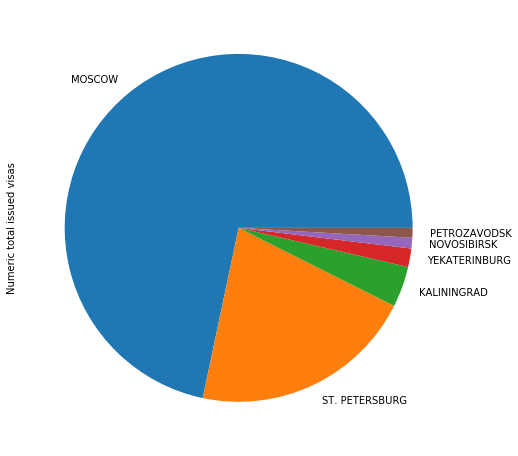

In [30]:
numeric_data[numeric_data['Country where consulate is located'] == 'RUSSIAN FEDERATION']\
    .groupby(['Consulate'])['Numeric total issued visas'].sum().sort_values(ascending = False).head(6)\
.plot(kind='pie', subplots=True, figsize=(8, 8));

**Рейтинг щедрости консульств в России по доле выданных виз**

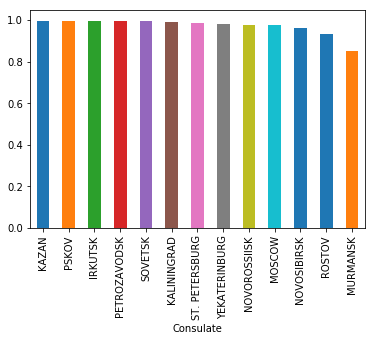

In [31]:
numeric_data[numeric_data['Country where consulate is located'] == 'RUSSIAN FEDERATION']\
    .groupby(['Consulate'])['Share of issued visas'].mean().sort_values(ascending = False).plot(kind='bar')

**Рейтинг строгости консульств в России по количеству не выданных виз**

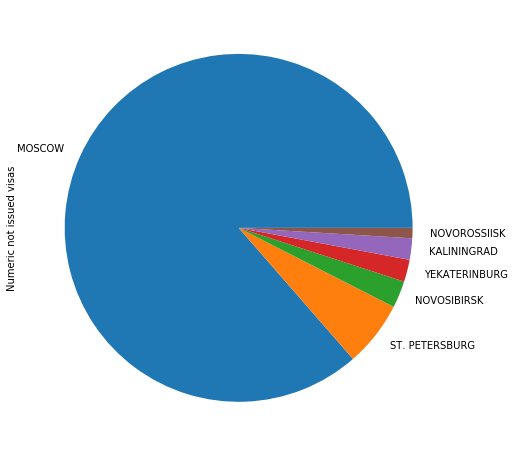

In [32]:
numeric_data[numeric_data['Country where consulate is located'] == 'RUSSIAN FEDERATION']\
    .groupby(['Consulate'])['Numeric not issued visas'].sum().sort_values(ascending = False).head(6)\
.plot(kind='pie', subplots=True, figsize=(8, 8));

**Рейтинг строгости консульств в России по доле не выданных виз**

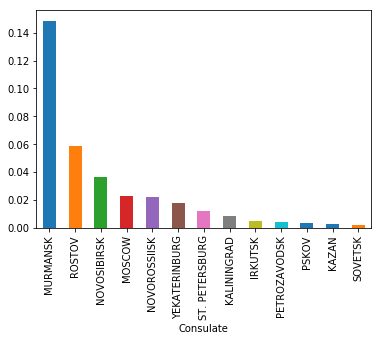

In [33]:
numeric_data[numeric_data['Country where consulate is located'] == 'RUSSIAN FEDERATION']\
    .groupby(['Consulate'])['Share of not issued visas'].mean().sort_values(ascending = False).plot(kind='bar')

## Выводы

 - С помощью функций dropna и apply были преобразованы данные из типа object в integer
 - Лямбда-функций помогли заполнить пропущенные данные
 - Готовые модули из библиотеки plotly позволили сделать интерактивные карты


 - К России страны Шенгенского союза относятся лояльнее всего, после Беларуси
 - Много отказов у Венесуэлы, стран Африки и Ближнего Востока
 - Есть значимые и пока что неустранимые потери данных по информации с визами, выдаваемыми Швецией, получился сильный выброс


In [34]:
#конец

Возможно, о таких штуках надо было спросить СРАЗУ, о том, что тебе не понятно

У меня не раскрыто, какие типы виз и зачем нужны, что тут вообще творится с данными

Посмотреть по каким странам, офисам, больше всего пропусков - ну вот как раз Швеция забивательная

Нарисовать консульства на карте (???), чтобы определять их нагрузку

Вывод должен быть не про то, что я делала, а про данные
как увязывается ситуация сейчас
Было бы здорово получить ещё данных, посранивать за другие годы и подсветить такие-то тренды

Очень много НаНов, с которыми я ничего не делаю - я читаю данные, но не чищу их, а потом уже надо чистить данные
Ничего не раскрыто про консульства
Гипотеза: например, предположить, какой процент трансферных виз, шанс получить LTV визу
Параметр, для которого я пишу формулу, оцениваю его, а потом смотрю по данным, что по ним есть
MEV вообще супер-прикольная, надо зацепиться за неё

Я использую много чисел, значение которых не раскрыто, нужно обосновать, почему я так делаю
Зачем я обрабатываю параметры?
Зачем коэффициент щедрости консульства? пр: ввели коэффициент щедрости консульства по каждому типу визу и мы можем оценить

Смотрю статистику по российским консульствам
В идеале бы сравнить однократные и многократные

Каким значением я заполняю пропуски и почему? 

Выводы: к последним трём надо дать комментарии, их же сами можно перелопатить в гипотезы
Почему нет пайчарта по другим странам

Аддишн - рекомендательный сервис в зависимости от того куда я подаюсь и откуда, с демкой

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [7]:
#doc = 'C:/Users/Anastasiia Murashova/Documents/2018-data-for-consulates.csv'
#data = pd.read_csv(doc)
data = pd.read_csv('../Schengen project/2018-data-for-consulates.csv')
data

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV) \n,Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


In [9]:
data[1903:1907]

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV) \n,Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,NaN,NaN,Selection Sub total in 2018,"5,313","4,277","1,553",767,14.4%,"16,016,599","14,265,282","8,325,850",58.4%,"113,687","1,539,362",9.6%,"16,021,912","14,383,246","1,540,129",9.6%
1905,NaN,NaN,Total worldwide 2018,"5,313","4,277","1,553",767,14.4%,"16,016,599","14,265,282","8,325,850",58.4%,"113,687","1,539,362",9.6%,"16,021,912","14,383,246","1,540,129",9.6%
1906,NaN,NaN,Share of subtotal on worldwide total,100%,100%,100%,100%,NaN,100%,100%,100%,NaN,100%,100%,NaN,100%,100%,100%,NaN


Давайте посмотрим, в какие страны вообще есть запросы по транзитным визам

In [26]:
atv_data = data.iloc[:1900, 0:8]
atv_data

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...
1895,Switzerland,USA,"NEW YORK, NY",1,1,1,NaN,NaN
1896,Switzerland,USA,"SAN FRANCISCO, CA",1,1,NaN,NaN,NaN
1897,Switzerland,USA,"WASHINGTON, DC",NaN,NaN,NaN,NaN,NaN
1898,Switzerland,VENEZUELA,CARACAS,NaN,NaN,NaN,NaN,NaN


In [27]:
numeric_data1 = data.iloc[:1901, 0:3]
numeric_data1

,Schengen State,Country where consulate is located,Consulate
0,Austria,ALBANIA,TIRANA
1,Austria,ALGERIA,ALGIERS
2,Austria,ARGENTINA,BUENOS AIRES
3,Austria,AUSTRALIA,CANBERRA
4,Austria,AZERBAIJAN,BAKU
...,...,...,...
1896,Switzerland,USA,"SAN FRANCISCO, CA"
1897,Switzerland,USA,"WASHINGTON, DC"
1898,Switzerland,VENEZUELA,CARACAS
1899,Switzerland,VIETNAM,HO CHI MINH


Так как у нас много строковых данных и пропущенных значений, трансформируем датасет в более используемый вариант

In [29]:
usable_data = data.iloc[:1900]
usable_data

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV) \n,Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,Switzerland,USA,"NEW YORK, NY",1,1,1,NaN,NaN,3561,3444,3430,99.6%,100,17,0.5%,"3,562","3,545",17,0.5%
1896,Switzerland,USA,"SAN FRANCISCO, CA",1,1,NaN,NaN,NaN,3642,3623,3529,97.4%,13,6,0.2%,"3,643","3,637",6,0.2%
1897,Switzerland,USA,"WASHINGTON, DC",NaN,NaN,NaN,NaN,NaN,1066,1022,511,50.0%,14,30,2.8%,"1,066","1,036",30,2.8%
1898,Switzerland,VENEZUELA,CARACAS,NaN,NaN,NaN,NaN,NaN,7,6,4,66.7%,NaN,1,14.3%,7,6,1,14.3%


In [ ]:
numeric_data['Numeric applies'] = data['Total ATVs and uniform visas applied for']\
    .iloc[:1900].dropna().apply(lambda s: int(s.replace(',', '')))
numeric_data['Numeric total issued visas'] = data['Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ']\
    .iloc[:1900].dropna().apply(lambda s: int(s.replace(',', '')))
numeric_data['Numeric not issued visas'] = data['Total ATVs and uniform visas not issued']\
    .iloc[:1900].dropna().apply(lambda s: int(s.replace(',', '')))

In [36]:
def replace_comma(row):
    for i, item in enumerate(row):
        row[i] = int(row[i].replace(',', ''))
    return row

In [37]:
data_herata = {
            'A':['6,5', '2,8', '3'], 
            'B':['4', '1,5', '6,3'], 
            'C':['4,7', '8,0', '1,9'] }
     
# Convert the dictionary into DataFrame 
dh = pd.DataFrame(data_herata)
print(dh)

     A    B    C
0  6,5    4  4,7
1  2,8  1,5  8,0
2    3  6,3  1,9


In [38]:
dh = dh.apply(lambda row : replace_comma(row))
print(dh)

    A   B   C
0  65   4  47
1  28  15  80
2   3  63  19


In [ ]:
ПРИДУМАЙ КАК ОБРАБОТАТЬ КОЛОНКИ ИДЁМ ПО КОЛОНКАМ

In [ ]:
def main():
    # create a dictionary with
    # three fields each
    data = {
            'A':[0, 2, 3], 
            'B':[4, 15, 6], 
            'C':[47, 8, 19] }
     
    # Convert the dictionary into DataFrame 
    df = pd.DataFrame(data)
  
    print('Before applying function: ')
    print(df)
      
    # applying function to each row in
    # dataframe and storing result in a new column
    df = df.apply(lambda row : replace(row))
      
  
    print('After Applying Function: ')
    # printing the new dataframe
    print(df)
  
if __name__ == '__main__':
    main()

In [ ]:
def funczion(dataframe_column):
    numeric_data['Numeric not issued visas'] = data['Total ATVs and uniform visas not issued']\
    .iloc[:1900].dropna().apply(lambda s: int(s.replace(',', '')))

In [42]:
new = pd.isna(atv_data['Not issued rate for ATVs']).isna()

In [ ]:
newmew = 